In [10]:
import pandas as pd
import pickle
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load reactions file
file = open('FAERS_Y.pkl', 'r')
y = pickle.load(file)
file.close()
y.head()

0    INJECTION SITE BRUISING\,DYSPEPSIA\,ARTHRALGIA...
1               MUSCLE SPASMS\,PAIN\,PAIN IN EXTREMITY
2    LOCAL SWELLING\,PRURITUS\,CONCUSSION\,MYALGIA\...
3                                  INJECTION SITE RASH
4                                                  TIC
Name: reactions, dtype: object

In [3]:
def split_coma(s):
    spl = s.split('\\,')
    return map(lambda x: x.lstrip(' 0123456789-_').upper(), spl)

reactions_df = pd.DataFrame()

reactions_df['reaction'] = map(split_coma, y)

reactions_df.head()

,reaction
0,"[INJECTION SITE BRUISING, DYSPEPSIA, ARTHRALGI..."
1,"[MUSCLE SPASMS, PAIN, PAIN IN EXTREMITY]"
2,"[LOCAL SWELLING, PRURITUS, CONCUSSION, MYALGIA..."
3,[INJECTION SITE RASH]
4,[TIC]


In [4]:
mlb = MultiLabelBinarizer(sparse_output=True)
y_mlb = mlb.fit_transform(reactions_df.reaction)
y_mlb.shape

(1825951, 12556)

In [5]:
ys = y_mlb.tocsr()

In [6]:
counts = ys.sum(axis=0)

In [7]:
counts_Df = pd.DataFrame(counts).T
counts_Df['reaction'] = mlb.classes_
counts_Df.columns = ['count', 'reaction']
counts_Df.head()

,count,reaction
0,7020,ABASIA
1,1,ABDOMEN CRUSHING
2,445,ABDOMINAL ABSCESS
3,374,ABDOMINAL ADHESIONS
4,3,ABDOMINAL BRUIT


In [8]:
counts_sorted = counts_Df.sort_values(by = ['count'], ascending=False).reset_index(drop=True)
counts_sorted.head()

,count,reaction
0,120963,NAUSEA
1,118671,DRUG INEFFECTIVE
2,112757,FATIGUE
3,92167,DIARRHOEA
4,90648,HEADACHE


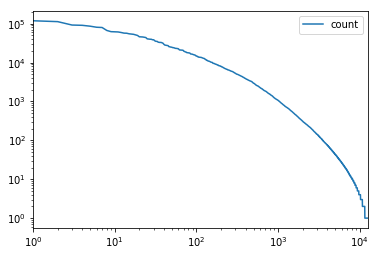

In [12]:
counts_sorted.plot(loglog=True)
plt.show()

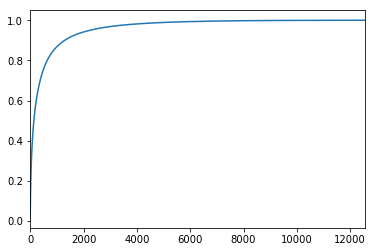

In [15]:
import numpy as np

cumsum = np.cumsum(counts_sorted['count'])
cumsum_norm = cumsum/cumsum.max()
cumsum_norm.plot()
plt.show()

In [16]:
counts_sorted.loc[2000,'count']

309

In [17]:
top2000 = counts_sorted.head(2000)
top2000.shape

(2000, 2)

In [22]:
reactions_set = set(top2000.reaction)

def reaction_intersection(reaction_list):
    return list(reactions_set.intersection(reaction_list))

y2000 = pd.DataFrame()

y2000['reaction'] = map(reaction_intersection, reactions_df.reaction)

y2000.head()

,reaction
0,"[INJECTION SITE BRUISING, DYSPEPSIA, ARTHRALGI..."
1,"[MUSCLE SPASMS, PAIN, PAIN IN EXTREMITY]"
2,"[PAIN, PRURITUS, CONCUSSION, MYALGIA, FALL, LO..."
3,[INJECTION SITE RASH]
4,[TIC]


In [30]:
mlb2000 = MultiLabelBinarizer(sparse_output=True)
y2000_mlb = mlb2000.fit_transform(y2000['reaction'])
y2000_mlb.shape

(1825951, 2000)

In [36]:
top2000['reaction'].to_csv("Top2000Reactions.csv")